In [1]:
#1 loading required library
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split 
import statsmodels.api as sm
from sklearn import tree
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#2 Setting the path
os.chdir("C:/Users/Ankush Saha/Downloads")

# loading Training data

In [2]:
#3 loading data
x = pd.read_csv("day.csv")

In [3]:
x.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## preaparing data

In [4]:
#4 preaparing data
x = x.set_index('instant')
x = x.iloc[:,1:15]
for i in range(7):
    x.iloc[:,i] =x.iloc[:,i].astype('object')

# Data Pre-Processing

## Missing value analysis

In [ ]:
#7 missing value analysis
mval = pd.DataFrame(x.isnull().sum())
mval = mval.rename(columns ={0 :'x'})
mval = mval.reset_index()
mval = mval.sort_values('x', ascending= False).reset_index(drop = True)
mval.head()

## Outlier analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x1dce110e518>,
 'caps': [<matplotlib.lines.Line2D at 0x1dce110eba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dce110e0b8>],
 'medians': [<matplotlib.lines.Line2D at 0x1dce110efd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dce111e5c0>],
 'means': []}

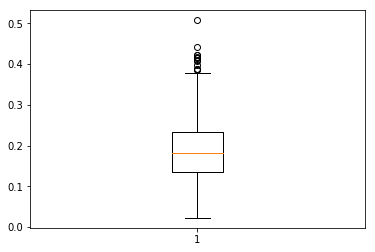

In [5]:
#8 Plot boxplot to visualize Outliers
%matplotlib inline  
#plt.boxplot(x["casual"])
plt.boxplot(x['windspeed'])


In [6]:
#9 removing outliers
for i in range(14):
    print (i)
    q75,q25 = np.percentile(x.iloc[:,i], [75,25])
    iqr = q75 - q25
    
    min = q25 - 1.5*iqr
    max = q75 + 1.5*iqr
    
    x = x.drop(x[x.iloc[:,i] < min].index)
    x = x.drop(x[x.iloc[:,i] > max].index)
x = x.reset_index(drop = True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [ ]:
#10 taking backup
backup = x

## Feature selection

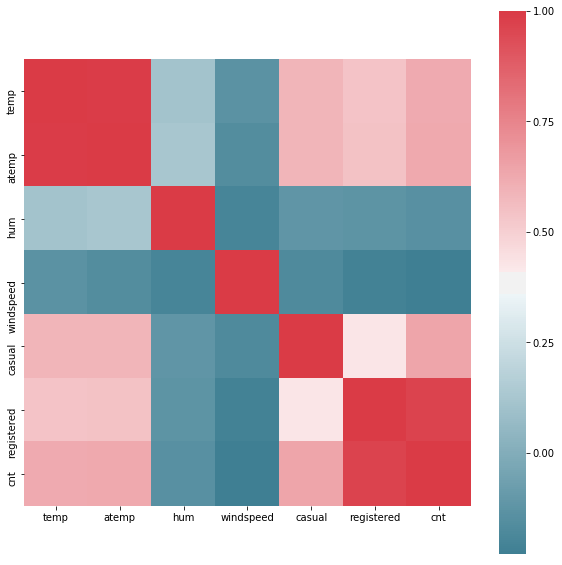

In [7]:
#11 Corellation plot
f, ax = plt.subplots(figsize =(10,10))
corr = x.iloc[:,7:14].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [8]:
catgnames = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit']

## Chi-square test

In [9]:
#12 loop for chi square values
first = []
second = []
p_value = []
for i in catgnames:
    for j in catgnames:
        print(i, j)
        chi2, p, dof, ex = chi2_contingency(pd.crosstab(x[i], x[j]))
        print(p)
        first.append(i)
        second.append(j)
        p_value.append(p)
first = pd.DataFrame(first)
first = first.rename(columns ={0 :'first'})
second = pd.DataFrame(second)
second = second.rename(columns ={0 :'second'})
p_value = pd.DataFrame(p_value)
p_value = p_value.rename(columns ={0:'p_value'})
p_val = pd.concat([first, second, p_value], axis =1)
p_val = p_val.sort_values('p_value',ascending= False).reset_index(drop = True)

season season
0.0
season yr
0.89950387602208
season mnth
0.0
season holiday
1.0
season weekday
0.99920607280162
season workingday
0.3053704760812475
season weathersit
0.003578275821665477
yr season
0.89950387602208
yr yr
1.356781737234796e-143
yr mnth
0.9997710762738306
yr holiday
1.0
yr weekday
0.34644694072611504
yr workingday
0.03278304974666283
yr weathersit
0.2825074283722575
mnth season
0.0
mnth yr
0.9997710762738306
mnth mnth
0.0
mnth holiday
1.0
mnth weekday
0.9999999999999997
mnth workingday
0.8672481710645695
mnth weathersit
0.0032213700910868285
holiday season
1.0
holiday yr
1.0
holiday mnth
1.0
holiday holiday
1.0
holiday weekday
1.0
holiday workingday
1.0
holiday weathersit
1.0
weekday season
0.99920607280162
weekday yr
0.34644694072611504
weekday mnth
0.9999999999999997
weekday holiday
1.0
weekday weekday
0.0
weekday workingday
3.166663770038422e-138
weekday weathersit
0.32122718010678825
workingday season
0.3053704760812491
workingday yr
0.03278304974666283
workingday mn

In [10]:
p_val

,first,second,p_value
0,holiday,holiday,1.000000e+00
1,weathersit,holiday,1.000000e+00
2,workingday,holiday,1.000000e+00
3,weekday,holiday,1.000000e+00
4,holiday,weathersit,1.000000e+00
5,holiday,workingday,1.000000e+00
6,holiday,weekday,1.000000e+00
7,holiday,mnth,1.000000e+00
8,holiday,yr,1.000000e+00
9,mnth,holiday,1.000000e+00


In [ ]:
#13 removing corellated dependent variables
x = x.drop(['season','weekday','workingday','weathersit','temp','registered'],axis = 1)

## Feature Scaling

In [ ]:
#14 plotting distribution
%matplotlib inline  
plt.hist(x['casual'], bins='auto')
plt.xlabel("Distribution of Casual")

In [ ]:
#15 normalising
x.iloc[:,6] =((x.iloc[:,6] - x.iloc[:,6].min())/(x.iloc[:,6].max()-x.iloc[:,6].min()))

In [ ]:
x.head()

## Feature sampling

In [ ]:
#16 train test split
train, test = train_test_split(x, test_size = 0.3)

# Model Development

In [ ]:
#17 defining model evaluation techniques
def mape(x,y):
    return abs((x - y)/x).mean()
def mae(x,y):
    return abs(x - y).mean()

# Linear regression

In [ ]:
#18 preparing dataset for linear regression
for i in range(3):
    print(i)
    train.iloc[:,i] = train.iloc[:,i].astype('int')
    test.iloc[:,i] = test.iloc[:,i].astype('int')

In [ ]:
#19 Linear regression Model
model = sm.OLS(train.iloc[:,7], train.iloc[:,0:7]).fit()
predicted = model.predict(test.iloc[:,0:7])
print(mape(test.iloc[:,7],predicted))
print(mae(test.iloc[:,7],predicted))

In [ ]:
#20 model summary
print(model.summary())

In [ ]:
#21 train test split
train, test = train_test_split(x, test_size = 0.3)

## Decision Tree

In [ ]:
#22 Decision Tree model
model2 = DecisionTreeRegressor(max_depth= 9).fit(train.iloc[:,0:7],train.iloc[:,7])
predicted2 = model2.predict(test.iloc[:,0:7])
print(mape(test.iloc[:,7],predicted2))
print(mae(test.iloc[:,7],predicted2))

## Random Forest

In [ ]:
#23 preparing data for Random Forest & KNN
x_indi = train.iloc[:,0:7]
x_dep = train.iloc[:,7]
y_indi = test.iloc[:,0:7]
y_dep = test.iloc[:,7]

In [ ]:
#24 Random Forest Model
model3 = RandomForestRegressor(n_estimators= 100).fit(x_indi,x_dep)
predicted3 = model3.predict(y_indi)
print(mape(y_dep,predicted3))
print(mae(y_dep,predicted3))

## KNN

In [ ]:
#24 KNN model
KNN_model = KNeighborsRegressor(n_neighbors = 3).fit(x_indi, x_dep)
predicted4 = KNN_model.predict(y_indi)
print(mape(y_dep,predicted4))
print(mae(y_dep,predicted4))

# Test case

In [ ]:
#25 defining test value
sampleInput = pd.DataFrame({'yr' : [1],'mnth' : [12],'holiday': [0],'atemp' : [0.474] ,'hum' : [.627] , 'windspeed': [.19],'casual': [713]})

In [ ]:
#26 preparing test values
for i in range(3):
    print(i)
    sampleInput.iloc[:,i] = sampleInput.iloc[:,i].astype('object')

In [ ]:
#27 scaling test value
sampleInput.iloc[:,6] =((sampleInput.iloc[:,6] - backup.iloc[:,11].min())/(backup.iloc[:,11].max()-backup.iloc[:,11].min()))

In [ ]:
#28 predicting count
predicted_count = model3.predict(sampleInput)

In [ ]:
#predicted count
predicted_count

In [1]:
"Spotle.ai" [-1]

'i'